In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes.csv')

# Print the first 5 rows of the DataFrame
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Basic EDA and statistical analysis**

In [5]:
# Obtain information about the data types, columns, null value counts, memory usage etc.

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. 

In [6]:
# describe() method deals only with numerical values

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


From info() method, there is no "nan" value in the dataset.
However, from describe() method, there are 0 values that do not make sense.
Following columns have invalid zero values:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

**Plot Hist plot**

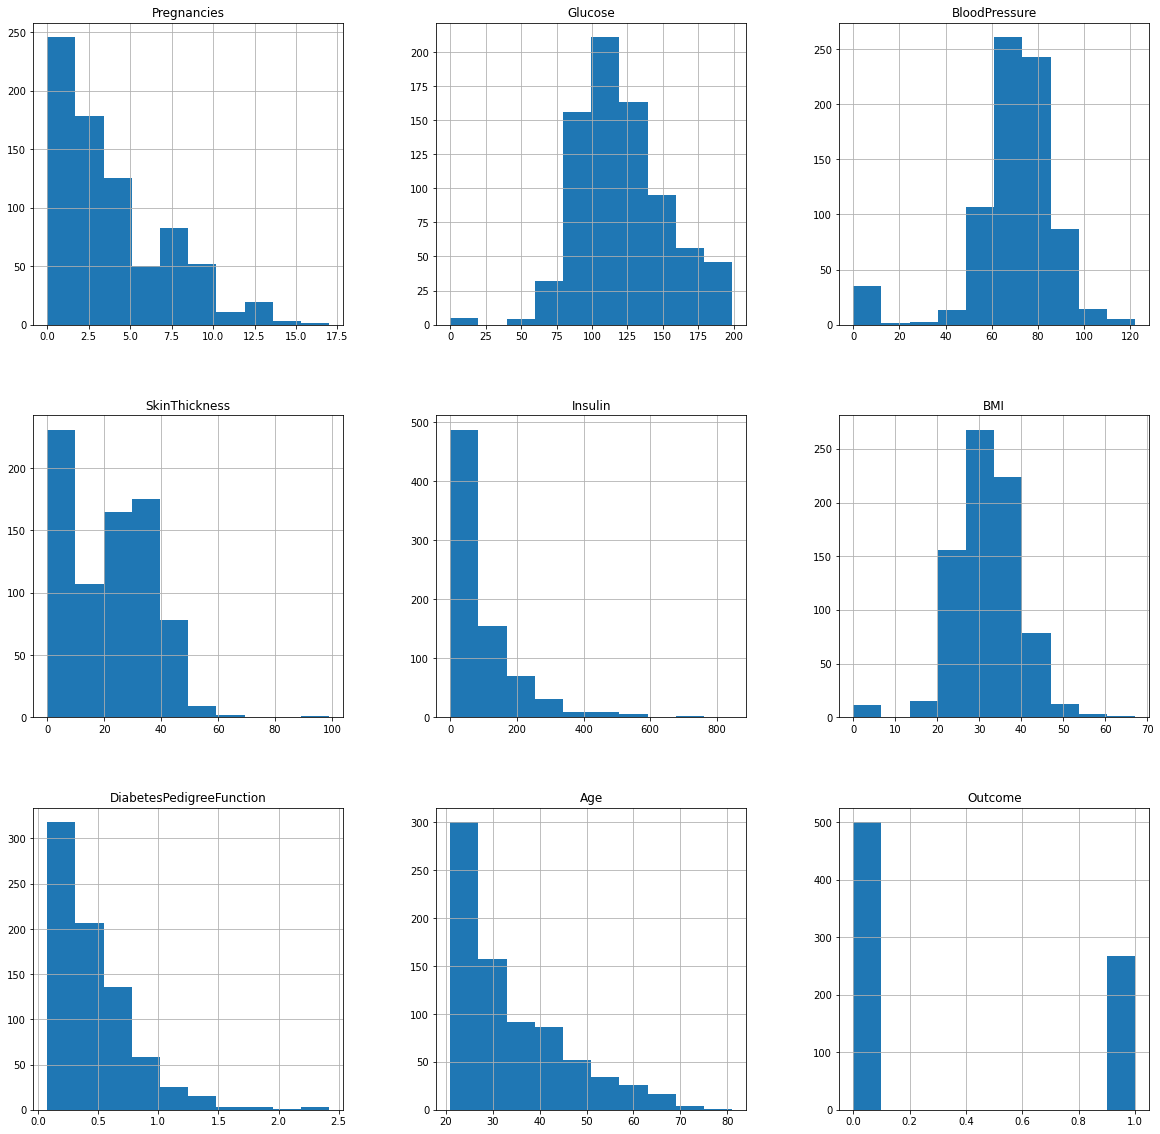

In [8]:
p = diabetes_data.hist(figsize = (20,20))

**Calculate how many invalid zero value is in each feature**

In [11]:
# Features with invalid zero value
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Total data count
total_count = diabetes_data.shape[0]

# Calculate the number of invalid zero value in each feature
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('There are {0} invalid zero values in {1} feature, and its percentage is {2:.2f}.'.format(zero_count,feature,100*zero_count/total_count))

There are 5 invalid zero values in Glucose feature, and its percentage is 0.65.
There are 35 invalid zero values in BloodPressure feature, and its percentage is 4.56.
There are 227 invalid zero values in SkinThickness feature, and its percentage is 29.56.
There are 374 invalid zero values in Insulin feature, and its percentage is 48.70.
There are 11 invalid zero values in BMI feature, and its percentage is 1.43.


**Replace invalid zero value with mean value**

In [12]:
diabetes_data[zero_features].mean()

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [13]:
# Replace invalid zero value with mean value
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [15]:
# Double-check whether all the invalid value is replaced
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('There are {0} invalid zero values in {1} feature, and its percentage is {2:.2f}.'.format(zero_count,feature,100*zero_count/total_count))

There are 0 invalid zero values in Glucose feature, and its percentage is 0.00.
There are 0 invalid zero values in BloodPressure feature, and its percentage is 0.00.
There are 0 invalid zero values in SkinThickness feature, and its percentage is 0.00.
There are 0 invalid zero values in Insulin feature, and its percentage is 0.00.
There are 0 invalid zero values in BMI feature, and its percentage is 0.00.


**Scale the dataset**

In [18]:
# Seperate features and target values
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

In [19]:
# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

**Train the model with cleaned and scaled dataset**

In [21]:
# Train the model
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

**Prepare functions for evaluation**

In [23]:
def get_model_evaluation(y_true, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_true, pred)
    accuracy = accuracy_score(y_true, pred)
    precision = precision_score(y_true, pred)
    recall = recall_score(y_true, pred)
    f1 = f1_score(y_true, pred)
    # ROC-AUC (needs pred_proba for input)
    roc_auc = roc_auc_score(y_true, pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [24]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # Extract precision and recall by various thresholds values 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X: threshold값으로, Y: precision and recall. Precesion = ('--')
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # Set xticks
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # Set grid and legend
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

**Predict and Evaluate**

In [25]:
# Predict
pred = lr_clf.predict(X_test)
# Only extract posive probability
pred_proba = lr_clf.predict_proba(X_test)[:,1]
# Evaluate
get_model_evaluation(y_test,pred, pred_proba)

Confusion Matrix
[[85 15]
 [16 38]]
Accuracy: 0.7987, Precision: 0.7170, Recall: 0.7037,    F1: 0.7103, AUC:0.7769


**Precision-Recall Curve**

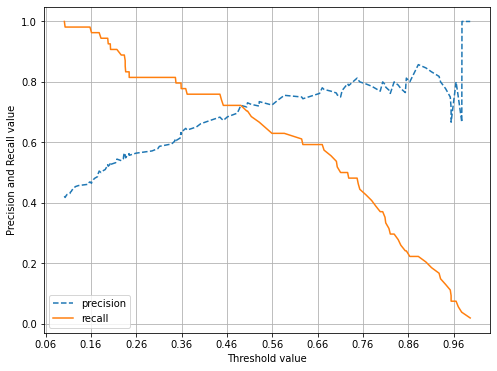

In [26]:
precision_recall_curve_plot(y_test, pred_proba)

**Evaluate models with different classification threshold**

In [33]:
from sklearn.preprocessing import Binarizer

def get_eval_by_thr(y_test, pred_proba, thrs):
    for thr in thrs:
        binarizer = Binarizer(threshold=thr).fit(pred_proba)
        custom_predict = binarizer.transform(pred_proba)
        print('Threshold:', thr)
        get_model_evaluation(y_test, custom_predict, pred_proba)

In [35]:
thrs = list(np.arange(0.36,0.56,0.02))
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_thr(y_test, pred_proba[:,1].reshape(-1,1), thrs)

Threshold: 0.36
Confusion Matrix
[[76 24]
 [12 42]]
Accuracy: 0.7662, Precision: 0.6364, Recall: 0.7778,    F1: 0.7000, AUC:0.7689
Threshold: 0.38
Confusion Matrix
[[78 22]
 [13 41]]
Accuracy: 0.7727, Precision: 0.6508, Recall: 0.7593,    F1: 0.7009, AUC:0.7696
Threshold: 0.4
Confusion Matrix
[[79 21]
 [13 41]]
Accuracy: 0.7792, Precision: 0.6613, Recall: 0.7593,    F1: 0.7069, AUC:0.7746
Threshold: 0.42000000000000004
Confusion Matrix
[[80 20]
 [13 41]]
Accuracy: 0.7857, Precision: 0.6721, Recall: 0.7593,    F1: 0.7130, AUC:0.7796
Threshold: 0.44000000000000006
Confusion Matrix
[[81 19]
 [13 41]]
Accuracy: 0.7922, Precision: 0.6833, Recall: 0.7593,    F1: 0.7193, AUC:0.7846
Threshold: 0.4600000000000001
Confusion Matrix
[[82 18]
 [15 39]]
Accuracy: 0.7857, Precision: 0.6842, Recall: 0.7222,    F1: 0.7027, AUC:0.7711
Threshold: 0.4800000000000001
Confusion Matrix
[[83 17]
 [15 39]]
Accuracy: 0.7922, Precision: 0.6964, Recall: 0.7222,    F1: 0.7091, AUC:0.7761
Threshold: 0.5000000000000

**Model evaluation with threshold value of 0.44**

In [38]:
# Construct Binarizer with threshold value of 0.44
binarizer = Binarizer(threshold=0.44)

# Convert predict_probability values using the binarizer
pred_thr_044 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

# Final Evaluation
get_model_evaluation(y_test, pred_thr_044, pred_proba[:,1])

Confusion Matrix
[[81 19]
 [13 41]]
Accuracy: 0.7922, Precision: 0.6833, Recall: 0.7593,    F1: 0.7193, AUC:0.7846
